In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

In [2]:
df1 = pd.read_csv("reviews_211.csv")
df1.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,"Love, love this place. Every time I go, even i...",Boba Guys,NaN
1,NaN,NaN,1.0 star rating,Boba guys has always been a favorite for me. T...,Boba Guys,1.0
2,NaN,NaN,3.0 star rating,I was real psyched to try this place out after...,Boba Guys,NaN
3,6.0,3.0,5.0 star rating,Just when I thought I had found my favorite fl...,Boba Guys,6.0
4,5.0,4.0,4.0 star rating,Culture is more than just high fallutin' museu...,Boba Guys,6.0


In [3]:
df1.tail(30)

,cool,funny,rating,review,store,useful
24124,NaN,NaN,3.0 star rating,"Love this place, but I have to give them a thr...",Village Tea Shop,NaN
24125,NaN,NaN,5.0 star rating,Great selection of teas. Extremely knowledgabl...,Village Tea Shop,NaN
24126,NaN,NaN,5.0 star rating,"Delicious! Their ""wellness"" tea is perfect for...",Village Tea Shop,NaN
24127,1.0,1.0,5.0 star rating,Awesome selection ! Owners are great people an...,Village Tea Shop,1.0
24128,NaN,NaN,5.0 star rating,Great local tea shop. The owners are very frie...,Village Tea Shop,1.0
24129,1.0,NaN,5.0 star rating,Such good and fresh teas! Best bubble tea ever...,Village Tea Shop,1.0
24130,NaN,NaN,5.0 star rating,amazing! my first time having bubble tea and I...,Village Tea Shop,NaN
24131,NaN,NaN,5.0 star rating,Great selection of teas. Owners a VERY knowled...,Village Tea Shop,NaN
24132,NaN,NaN,5.0 star rating,Finding Village Tea was an unexpected surprise...,Village Tea Shop,NaN
24133,NaN,NaN,5.0 star rating,I'm in love with bubble tea & they have so man...,Bobaloca Bubble Tea and Coffee House,NaN


In [75]:
df1.drop(df1.tail(10).index,inplace=True)

In [4]:
df1.tail(20)

,cool,funny,rating,review,store,useful
24134,NaN,NaN,3.0 star rating,This is like the only bubble tea place in the ...,Bobaloca Bubble Tea and Coffee House,NaN
24135,NaN,NaN,5.0 star rating,This small shop is great. The customer service...,Bobaloca Bubble Tea and Coffee House,NaN
24136,NaN,NaN,5.0 star rating,"I love it, my favorite bubble tea. Is a small ...",Bobaloca Bubble Tea and Coffee House,NaN
24137,NaN,NaN,4.0 star rating,This is an unexpected oasis in the middle of b...,Bobaloca Bubble Tea and Coffee House,NaN
24138,NaN,NaN,4.0 star rating,I had noticed this cute cafe a couple of times...,Bobaloca Bubble Tea and Coffee House,NaN
24139,2.0,NaN,5.0 star rating,So excited and happy that there's a decent bub...,Bobaloca Bubble Tea and Coffee House,NaN
24140,3.0,NaN,2.0 star rating,I really wanted stopped by this store before I...,Bobaloca Bubble Tea and Coffee House,1.0
24141,NaN,NaN,5.0 star rating,Finally a bubble tea in the area! I was beyond...,Bobaloca Bubble Tea and Coffee House,NaN
24142,2.0,NaN,5.0 star rating,They have workout special with your favorite m...,Bobaloca Bubble Tea and Coffee House,2.0
24143,NaN,NaN,5.0 star rating,"Went to Bobaloca this morning with friends, go...",Bobaloca Bubble Tea and Coffee House,NaN


In [5]:
df2 = pd.read_csv("review_212_300.csv")
df2.head()

,Unnamed: 0,cool,funny,rating,review,store,useful
0,0,NaN,NaN,5.0 star rating,This place is super affordable (compared to ov...,Cool Fresh Juice Bar,NaN
1,1,1.0,NaN,4.0 star rating,I came into Cool Fresh Juice Bar on a Friday a...,Cool Fresh Juice Bar,1.0
2,2,NaN,NaN,5.0 star rating,We were looking for a refreshing drink on a ho...,Cool Fresh Juice Bar,NaN
3,3,NaN,NaN,5.0 star rating,I was feeling like I needed some fresh fruit a...,Cool Fresh Juice Bar,NaN
4,4,NaN,NaN,5.0 star rating,THIS IS MY FAVORITE JUICE BAR IN NEW YORK. The...,Cool Fresh Juice Bar,1.0


In [6]:
df2.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
df2.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,This place is super affordable (compared to ov...,Cool Fresh Juice Bar,NaN
1,1.0,NaN,4.0 star rating,I came into Cool Fresh Juice Bar on a Friday a...,Cool Fresh Juice Bar,1.0
2,NaN,NaN,5.0 star rating,We were looking for a refreshing drink on a ho...,Cool Fresh Juice Bar,NaN
3,NaN,NaN,5.0 star rating,I was feeling like I needed some fresh fruit a...,Cool Fresh Juice Bar,NaN
4,NaN,NaN,5.0 star rating,THIS IS MY FAVORITE JUICE BAR IN NEW YORK. The...,Cool Fresh Juice Bar,1.0


In [8]:
df3 = pd.read_csv("reviews_500_all.csv")
df3.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,"Very nice bakery in Woodside! Cheap, affordabl...",Fay Da Bakery,NaN
1,5.0,NaN,4.0 star rating,It's a Chinese bakery with lots of cakes and v...,Fay Da Bakery,2.0
2,1.0,1.0,5.0 star rating,Cakes and pastries and sweets oh my! One of my...,Fay Da Bakery,1.0
3,NaN,NaN,5.0 star rating,We stop and Fay Da every chance we get! Have b...,Fay Da Bakery,NaN
4,NaN,NaN,3.0 star rating,"Just came for a coffee here, but they have a s...",Fay Da Bakery,NaN


In [9]:
df4 = pd.read_csv("reviews_685.csv")
df4.head()

,Unnamed: 0,cool,funny,rating,review,store,useful
0,0,NaN,NaN,5.0 star rating,Extremely pleased with my experience at T-Swir...,T-Swirl Crêpe,1.0
1,1,NaN,NaN,5.0 star rating,Wow just wow... 1st I'm not a crepe fan at all...,T-Swirl Crêpe,2.0
2,2,NaN,NaN,4.0 star rating,Fantastic Sunday brunch with my Kids(except my...,T-Swirl Crêpe,NaN
3,3,NaN,NaN,5.0 star rating,Four and a half stars for meeting and exceedin...,T-Swirl Crêpe,NaN
4,4,1.0,1.0,4.0 star rating,Boo Boo and I came here for a quick dessert af...,T-Swirl Crêpe,2.0


In [10]:
df4.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df4.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,Extremely pleased with my experience at T-Swir...,T-Swirl Crêpe,1.0
1,NaN,NaN,5.0 star rating,Wow just wow... 1st I'm not a crepe fan at all...,T-Swirl Crêpe,2.0
2,NaN,NaN,4.0 star rating,Fantastic Sunday brunch with my Kids(except my...,T-Swirl Crêpe,NaN
3,NaN,NaN,5.0 star rating,Four and a half stars for meeting and exceedin...,T-Swirl Crêpe,NaN
4,1.0,1.0,4.0 star rating,Boo Boo and I came here for a quick dessert af...,T-Swirl Crêpe,2.0


In [12]:
df5 = pd.read_csv("reviews_686_800.csv")
df5.head()

,Unnamed: 0,cool,funny,rating,review,store,useful
0,0,NaN,NaN,5.0 star rating,This is the best Pad Thai in the area! I usual...,Ploi Thai,NaN
1,1,1.0,NaN,3.0 star rating,The food was just okay. I got the drunken nood...,Ploi Thai,NaN
2,2,NaN,NaN,3.0 star rating,I have not been here in many many years. They ...,Ploi Thai,NaN
3,3,NaN,NaN,4.0 star rating,Best Thai in town. Great prices. Nice staff. E...,Ploi Thai,NaN
4,4,NaN,NaN,5.0 star rating,Just moved to the area and glad to find a good...,Ploi Thai,NaN


In [13]:
df5.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df5.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,This is the best Pad Thai in the area! I usual...,Ploi Thai,NaN
1,1.0,NaN,3.0 star rating,The food was just okay. I got the drunken nood...,Ploi Thai,NaN
2,NaN,NaN,3.0 star rating,I have not been here in many many years. They ...,Ploi Thai,NaN
3,NaN,NaN,4.0 star rating,Best Thai in town. Great prices. Nice staff. E...,Ploi Thai,NaN
4,NaN,NaN,5.0 star rating,Just moved to the area and glad to find a good...,Ploi Thai,NaN


In [15]:
frames = [df1, df2, df3, df4, df5]

In [16]:
result = pd.concat(frames, ignore_index=True)

In [17]:
result.head()

,cool,funny,rating,review,store,useful
0,NaN,NaN,5.0 star rating,"Love, love this place. Every time I go, even i...",Boba Guys,NaN
1,NaN,NaN,1.0 star rating,Boba guys has always been a favorite for me. T...,Boba Guys,1.0
2,NaN,NaN,3.0 star rating,I was real psyched to try this place out after...,Boba Guys,NaN
3,6.0,3.0,5.0 star rating,Just when I thought I had found my favorite fl...,Boba Guys,6.0
4,5.0,4.0,4.0 star rating,Culture is more than just high fallutin' museu...,Boba Guys,6.0


In [18]:
result.tail()

,cool,funny,rating,review,store,useful
103405,NaN,NaN,2.0 star rating,This place is cheap and has a semi-decent sala...,Yip’s,NaN
103406,NaN,NaN,3.0 star rating,Yips is the second in a series of the trifecta...,Yip’s,NaN
103407,1.0,NaN,5.0 star rating,Yips is awesome! I'm talking strictly about t...,Yip’s,1.0
103408,1.0,NaN,3.0 star rating,aka cheap chinese....when I have $4 in my pock...,Yip’s,1.0
103409,NaN,NaN,4.0 star rating,Cheapest place for Chinese I could find down h...,Yip’s,1.0


In [19]:
result['rating'].isnull().value_counts()

False    103410
Name: rating, dtype: int64

In [20]:
len(result)

103410

In [21]:
result['rating_clean'] = result['rating'].str.extract(r"(^\d.\d)")

In [22]:
result.head()

,cool,funny,rating,review,store,useful,rating_clean
0,NaN,NaN,5.0 star rating,"Love, love this place. Every time I go, even i...",Boba Guys,NaN,5.0
1,NaN,NaN,1.0 star rating,Boba guys has always been a favorite for me. T...,Boba Guys,1.0,1.0
2,NaN,NaN,3.0 star rating,I was real psyched to try this place out after...,Boba Guys,NaN,3.0
3,6.0,3.0,5.0 star rating,Just when I thought I had found my favorite fl...,Boba Guys,6.0,5.0
4,5.0,4.0,4.0 star rating,Culture is more than just high fallutin' museu...,Boba Guys,6.0,4.0


In [23]:
result.fillna(0, inplace=True)

In [24]:
result.drop(columns=['rating'],inplace=True)

In [25]:
result = result[['store', 'review', 'rating_clean', 'useful', 'funny', 'cool']]

In [26]:
result.to_csv("result.csv", index=False)

In [27]:
result = pd.read_csv("result.csv")

In [28]:
result.head()

,store,review,rating_clean,useful,funny,cool
0,Boba Guys,"Love, love this place. Every time I go, even i...",5.0,0.0,0.0,0.0
1,Boba Guys,Boba guys has always been a favorite for me. T...,1.0,1.0,0.0,0.0
2,Boba Guys,I was real psyched to try this place out after...,3.0,0.0,0.0,0.0
3,Boba Guys,Just when I thought I had found my favorite fl...,5.0,6.0,3.0,6.0
4,Boba Guys,Culture is more than just high fallutin' museu...,4.0,6.0,4.0,5.0


In [29]:
result['review length'] = result['review'].apply(len)
result.tail()

,store,review,rating_clean,useful,funny,cool,review length
103405,Yip’s,This place is cheap and has a semi-decent sala...,2.0,0.0,0.0,0.0,425
103406,Yip’s,Yips is the second in a series of the trifecta...,3.0,0.0,0.0,0.0,915
103407,Yip’s,Yips is awesome! I'm talking strictly about t...,5.0,1.0,0.0,1.0,637
103408,Yip’s,aka cheap chinese....when I have $4 in my pock...,3.0,1.0,0.0,1.0,569
103409,Yip’s,Cheapest place for Chinese I could find down h...,4.0,1.0,0.0,0.0,209


In [30]:
result.shape

(103410, 7)

In [31]:
len(result)

103410

In [32]:
result['review'][4]

"Culture is more than just high fallutin' museums and plays.  It's street art.  And fashion.  And food.  Even Bubble Tea.  And well, lately, I have been enjoying getting uh, steeped.  In its culture, if you will:\n\nAnyway, with all this in mind, I think it's tearrible that so many Boba Shops depend on powdered mixes.  So you bet I was drawn by the fact that this spot touts its exclusive reliance on premium loose leaf teas to brew its creations.  Its usage of fructose-free housemade syrups to add flavor didn't hurt either.\n\nYeah, Yeah.  How was the Bubble Tea, already?!?!\n\nFirst though, you need to guess what I ordered.  I'll give you a hint. I was in the mood for green tea.  So Matcha!  Yeah, that's right.  How'd you know?  I added almond milk and boba.  Went with 0% sugar and I have to say that between the natural sweetness of almond milk and the fact that the tapioca pearls seemed to have been tossed in simple syrup, this was just right for me.  Hubby got some sort of Oolong Mil

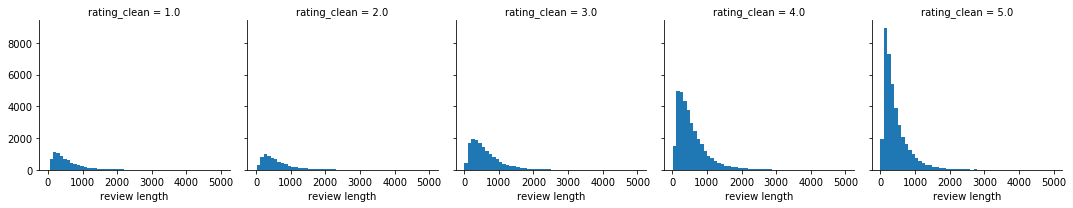

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=result, col='rating_clean')
g.map(plt.hist, 'review length', bins=50)

Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. 

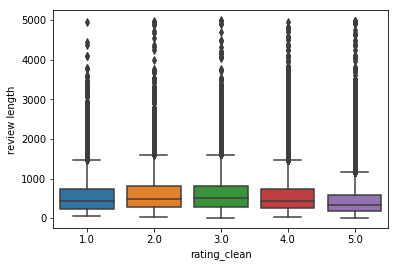

In [36]:
sns.boxplot(x='rating_clean', y='review length', data=result)

In [37]:
stars = result.groupby('rating_clean').mean()
stars.corr()

,useful,funny,cool,review length
useful,1.000000,0.751225,-0.000158,0.438967
funny,0.751225,1.000000,-0.329267,0.916341
cool,-0.000158,-0.329267,1.000000,-0.330753
review length,0.438967,0.916341,-0.330753,1.000000


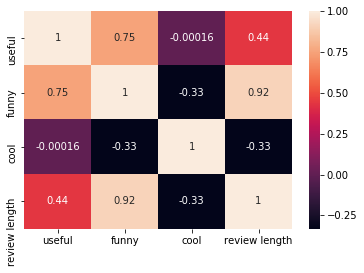

In [38]:
sns.heatmap(data=stars.corr(), annot=True)

We can see that review length has strong correlation with funny, and useful, but no correaltion with cool.
While useful has correaltion with funny, but not with cool. It might be that people write more about their funny experience with bubble tea store, kind of? 

In [39]:
pd.set_option('display.width', 1000)

In [39]:
# import nltk
# nltk.download('stopwords')

In [40]:
# import string
# import nltk
# from nltk.corpus import stopwords
# def text_process(text):
#     nopunc = [char for char in text if char not in string.punctuation]
#     nopunc = ''.join(nopunc)
    
#     return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [41]:
# sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
# print(text_process(sample_text))

In [42]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vectorizer = CountVectorizer()

In [43]:
# X = result['review']

In [44]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [45]:
# len(bow_transformer.vocabulary_)

In [46]:
# review_25 = X[24]

In [47]:
# review_25

In [48]:
# bow_25 = bow_transformer.transform([review_25])

In [50]:
# bow_25

In [43]:
def tokenize(s):
    blob = TextBlob(s.lower())

    words = [token for token in blob.words if len(token)>2]
    return words
    

In [44]:
def doc2vec_count(s):
    tokens = tokenize(s)
    vec = {}
    for t in tokens:
#if there is not t in dic, return the 0 
        vec[t] = vec.get(t, 0) + 1
    return vec

In [48]:
doc2vec_count(result.review[900])

{'awesome': 1,
 'and': 2,
 'simple': 1,
 'good': 1,
 'chewy': 1,
 'boba': 3,
 'milk': 2,
 'tea': 2,
 'yummy': 1,
 'midtown': 1,
 'needed': 1,
 'legit': 1,
 'spot': 2,
 'better': 1,
 'than': 1,
 'ktown': 1,
 'any': 1,
 'random': 1,
 'recommend': 1,
 'the': 1,
 'green': 1}

In [49]:
def print_sorted_vector(v):
    # this "lambda" thing is an anonymous function, google me to unluck bonus coding knowledge
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))

In [50]:
print_sorted_vector(doc2vec_count(result.review[30]))

('with', 2)
('when', 2)
('the', 2)
('great', 2)
('usual', 1)
('used', 1)
('twice', 1)
('treat', 1)
('this', 1)
('that', 1)
('temperature', 1)
('tapioca', 1)
('sweetness', 1)
('summer', 1)
('stuff', 1)
('soars', 1)
('shop', 1)
('service', 1)
('pearls', 1)
('normally', 1)


In [51]:
result.review

0         Love, love this place. Every time I go, even i...
1         Boba guys has always been a favorite for me. T...
2         I was real psyched to try this place out after...
3         Just when I thought I had found my favorite fl...
4         Culture is more than just high fallutin' museu...
5         If you like Hongkong milktea, it's a good plac...
6         I was really excited to come here after hearin...
7         Strawberry matcha latta is really popular so I...
8         This place is out of this world! They have a g...
9         Ever since I discovered this spot when I was i...
10        Every time I would visit New York, I always ma...
11        Worst. Tea. Ever. I would have given it a 2 st...
12        I only went here once and I actually loved it....
13        Delicious! I tried the Oolong black milk tea, ...
14        Okay. You are talking to a girl who worked at ...
15        I've been to the Boba Guy's when I went to San...
16        I'm a huge fan of their boba t

In [52]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)


matrix = vectorizer.fit_transform(result.review)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.head()

,''twas,'00,'07,'08,'09,'10,'100,'15-minute,'17,'18,...,，its,，look,，normal,，she,，so,，sometime,，the,，欢迎大家回复，,：in,｡･･｡
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
tfidf.shape

(103410, 75023)

In [68]:
print_sorted_vector(tfidf.iloc[30,:])

('soars', 0.3628420058469441)
('mere', 0.2616757794251705)
('charming', 0.2289488860220669)
('indian', 0.2165648488071006)
('apartment', 0.214735772273065)
('asia', 0.21031887149177234)
('temperature', 0.20972323951023095)
('chai', 0.19565910896827723)
('lived', 0.1873351017037002)
('normally', 0.18170926611912588)
('pearls', 0.17981645317071615)
('go-to', 0.17246945519356263)
('usual', 0.17011315428795706)
('treat', 0.16329281881300797)
('almond', 0.16171580706547198)
('twice', 0.16112816200222982)
('sweetness', 0.15270907369864972)
('great', 0.15214151948433136)
('stuff', 0.15151805376108077)
('summer', 0.14640462692296421)


In [169]:
result.head()

,store,review,rating_clean,useful,funny,cool,review length
0,Boba Guys,"Love, love this place. Every time I go, even i...",5.0,0.0,0.0,0.0,188
1,Boba Guys,Boba guys has always been a favorite for me. T...,1.0,1.0,0.0,0.0,1313
2,Boba Guys,I was real psyched to try this place out after...,3.0,0.0,0.0,0.0,695
3,Boba Guys,Just when I thought I had found my favorite fl...,5.0,6.0,3.0,6.0,751
4,Boba Guys,Culture is more than just high fallutin' museu...,4.0,6.0,4.0,5.0,1621


In [170]:
result.store.value_counts()

Kung Fu Tea                                2594
Vivi Bubble Tea                            2096
Paris Baguette                             2028
Spot Dessert Bar                           1574
Hanco’s                                    1336
CoCo Fresh Tea & Juice                     1309
Gong Cha                                   1290
Vanessa’s Dumpling House                   1031
Prince Tea House                           1028
Boba Guys                                  1023
Argo Tea                                    967
Kung Fu Little Steamed Buns Ramen           837
Spice                                       818
Yaya Tea Garden                             790
Tous Les Jours                              705
Caffe Bene                                  653
Pho Vietnam                                 632
Fay Da Bakery                               630
New World Mall Food Court                   600
Momofuku Ssam Bar                           600
Taiyaki NYC                             

In [171]:
result[result['rating_clean'] == '5.0']

,store,review,rating_clean,useful,funny,cool,review length
0,Boba Guys,"Love, love this place. Every time I go, even i...",5.0,0.0,0.0,0.0,188
3,Boba Guys,Just when I thought I had found my favorite fl...,5.0,6.0,3.0,6.0,751
8,Boba Guys,This place is out of this world! They have a g...,5.0,0.0,0.0,0.0,945
14,Boba Guys,Okay. You are talking to a girl who worked at ...,5.0,4.0,2.0,5.0,984
15,Boba Guys,I've been to the Boba Guy's when I went to San...,5.0,4.0,1.0,3.0,1113
16,Boba Guys,I'm a huge fan of their boba tea. For some rea...,5.0,2.0,0.0,1.0,167
17,Boba Guys,You know I just had to come here.\n\nIt's like...,5.0,20.0,14.0,20.0,323
18,Boba Guys,Have I been living under a rock? I just learne...,5.0,1.0,0.0,1.0,908
19,Boba Guys,Ok so i love these guys for one simple reason ...,5.0,0.0,0.0,0.0,338
20,Boba Guys,Interesting flavors and friendly staff! A nice...,5.0,0.0,0.0,0.0,213


In [172]:
result[result['rating_clean'] == '5.0'].store.value_counts().head(10)

Kung Fu Tea               867
Spot Dessert Bar          686
Vivi Bubble Tea           633
Paris Baguette            531
Boba Guys                 506
Gong Cha                  449
Hanco’s                   447
CoCo Fresh Tea & Juice    393
Prince Tea House          359
Kam Hing Coffee Shop      355
Name: store, dtype: int64